<a href="https://colab.research.google.com/github/Soedirman-Machine-Learning/dl-time-series-forecasting/blob/main/Univariat_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
!git clone https://github.com/Soedirman-Machine-Learning/dl-time-series-forecasting

Cloning into 'dl-time-series-forecasting'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('https://raw.githubusercontent.com/Soedirman-Machine-Learning/dl-time-series-forecasting/main/dataset_LSTM_Univariat.csv',index_col='date',parse_dates=True)
df.index.freq=('D')


In [140]:
df.head()

,y
date,
2000-01-01,0.180295
2000-01-02,0.177124
2000-01-03,0.173618
2000-01-04,0.171640
2000-01-05,0.166972


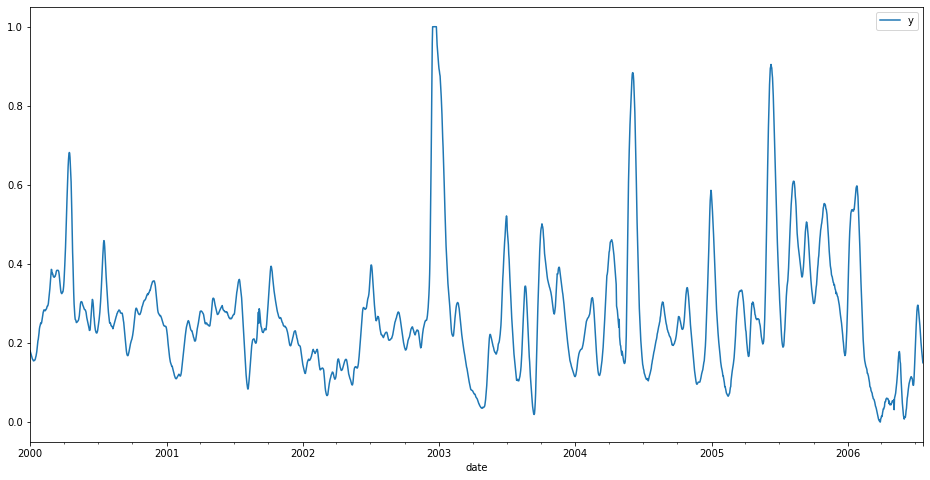

In [141]:
df.plot(figsize=(16,8))

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

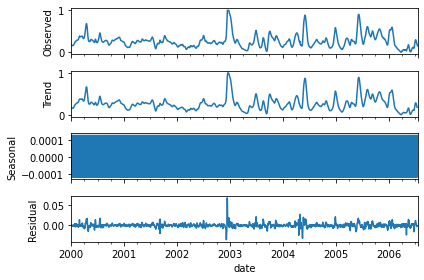

In [143]:
results = seasonal_decompose(df['y'])
results.plot();

In [58]:
len(df)

2394

In [144]:
train = df.iloc[:1916]
test = df.iloc[1916:]

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [146]:
df.head(),df.tail()

(                   y
 date                
 2000-01-01  0.180295
 2000-01-02  0.177124
 2000-01-03  0.173618
 2000-01-04  0.171640
 2000-01-05  0.166972,                    y
 date                
 2006-07-17  0.188976
 2006-07-18  0.178992
 2006-07-19  0.169742
 2006-07-20  0.159023
 2006-07-21  0.149922)

In [147]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [148]:
scaled_train[:10]

array([[0.1644019 ],
       [0.1611691 ],
       [0.15759481],
       [0.15557915],
       [0.15082072],
       [0.14746327],
       [0.14396658],
       [0.14192138],
       [0.14070005],
       [0.13840387]])

In [149]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [150]:
# define generator
n_input = 100
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [151]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.1644019  0.1611691  0.15759481 0.15557915 0.15082072 0.14746327
 0.14396658 0.14192138 0.14070005 0.13840387 0.13837951 0.13962451
 0.13947712 0.14069462 0.1428545  0.14762371 0.15085568 0.15646418
 0.16241499 0.17137301 0.18046488 0.18963146 0.19419737 0.20206186
 0.2101569  0.22063075 0.22629021 0.22954295 0.23417092 0.23637564
 0.23428852 0.23741681 0.2431371  0.2499486  0.25594747 0.26272941
 0.26591855 0.26953572 0.26953282 0.26949369 0.26721341 0.26829505
 0.26951428 0.27148188 0.27266056 0.27629626 0.27951262 0.27955957
 0.28195572 0.28641734 0.29560304 0.303628   0.31281601 0.32396635
 0.33777603 0.34817878 0.36177715 0.37425856 0.37301847 0.36290799
 0.36414554 0.36172676 0.35730738 0.35490946 0.35485617 0.35382402
 0.35618198 0.35613623 0.35937854 0.36171808 0.36739087 0.37088755
 0.37187396 0.37183106 0.37175634 0.37177777 0.37099181 0.36744415
 0.36057703 0.35023097 0.33891519 0.32871935 0.32078764 0.31485827
 0.31281601 0.31155159 0.31399238 0.31598657

In [152]:
X.shape

(1, 100, 1)

In [153]:
n_input = 100
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [154]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [155]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [158]:
# fit model
model.fit(generator,epochs=20)

Epoch 1/20
1816/1816 [==============================] - 62s 34ms/step - loss: 3.7806e-04
Epoch 2/20
1816/1816 [==============================] - 62s 34ms/step - loss: 1.8060e-04
Epoch 3/20
1816/1816 [==============================] - 63s 34ms/step - loss: 1.2020e-04
Epoch 4/20
1816/1816 [==============================] - 62s 34ms/step - loss: 1.2087e-04
Epoch 5/20
1816/1816 [==============================] - 62s 34ms/step - loss: 1.0609e-04
Epoch 6/20
1816/1816 [==============================] - 62s 34ms/step - loss: 8.5149e-05
Epoch 7/20
1816/1816 [==============================] - 62s 34ms/step - loss: 6.0573e-05
Epoch 8/20
1816/1816 [==============================] - 62s 34ms/step - loss: 8.0415e-05
Epoch 9/20
1816/1816 [==============================] - 62s 34ms/step - loss: 6.1906e-05
Epoch 10/20
1816/1816 [==============================] - 62s 34ms/step - loss: 5.1586e-05
Epoch 11/20
1816/1816 [==============================] - 62s 34ms/step - loss: 6.0128e-05
Epoch 12/20
1816/18

In [156]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


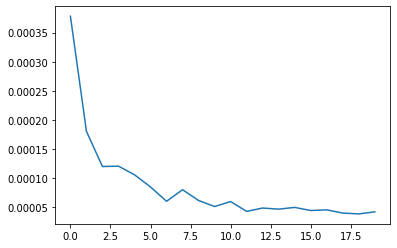

In [159]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [164]:
last_train_batch = scaled_train[-100:]

In [165]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [166]:
model.predict(last_train_batch)

array([[0.23996747]], dtype=float32)

In [167]:
scaled_test[0]

array([0.24311588])

In [168]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [169]:
test_predictions

[array([0.23996747], dtype=float32),
 array([0.22255057], dtype=float32),
 array([0.2028232], dtype=float32),
 array([0.1810916], dtype=float32),
 array([0.15774944], dtype=float32),
 array([0.13383222], dtype=float32),
 array([0.11044108], dtype=float32),
 array([0.08845909], dtype=float32),
 array([0.06844524], dtype=float32),
 array([0.0509248], dtype=float32),
 array([0.03585322], dtype=float32),
 array([0.02313739], dtype=float32),
 array([0.01420751], dtype=float32),
 array([0.00843125], dtype=float32),
 array([0.0049102], dtype=float32),
 array([0.00287366], dtype=float32),
 array([0.00182742], dtype=float32),
 array([0.00150708], dtype=float32),
 array([0.00216118], dtype=float32),
 array([0.00383495], dtype=float32),
 array([0.00644657], dtype=float32),
 array([0.00982084], dtype=float32),
 array([0.01381309], dtype=float32),
 array([0.01857703], dtype=float32),
 array([0.02467343], dtype=float32),
 array([0.03183044], dtype=float32),
 array([0.03977978], dtype=float32),
 arra

In [170]:
test.tail()

,y
date,
2006-07-17,0.188976
2006-07-18,0.178992
2006-07-19,0.169742
2006-07-20,0.159023
2006-07-21,0.149922


In [171]:
true_predictions = scaler.inverse_transform(test_predictions)

In [172]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


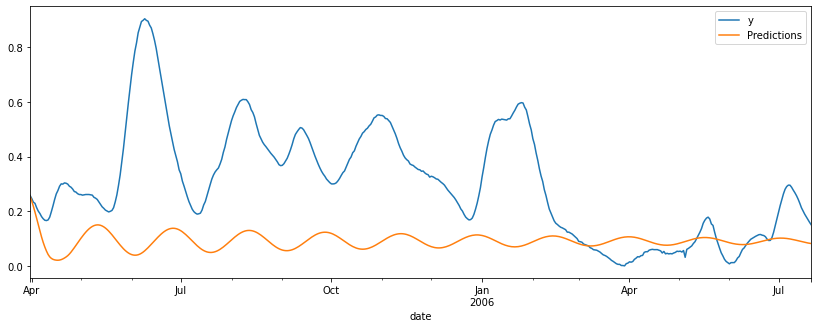

In [173]:
test.plot(figsize=(14,5))

In [178]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from math import sqrt
rmse=sqrt(mean_squared_error(test['y'],test['Predictions']))
print("RMSE=",rmse)
mae = metrics.mean_absolute_error(test['y'], test['Predictions'])
print("MAE=",mae)
mape = mean_absolute_error(test['y'], test['Predictions'])*100
print("MAPE= ", mape)

RMSE= 0.294485024306913
MAE= 0.2261850336410903
MAPE=  22.61850336410903
